# #                           Naive Bayes Classifier

## Group Members: Nhlalala Maluleke (1836213)
##                             : Percy Mohlala (1810589)  

In [74]:
import pandas as pd 
import numpy as np 
import math
import random

## Below is our multinomial naive bayes classifier implementation from scratch

In [75]:
class multiNB:
    
    def __init__(self, alpha=0.1):   #here we're using alpha=0.1 to smooth our table of likelihoods
        self.alpha = alpha  
       
        
    def fit(self, X_train, y_train):
        
        samples_no, no_features = X_train.shape #get the number of rows and columns using the .shape method
        
        
        self.classes_= np.unique(y_train) #get the unique classes in our dataset
        
        no_classes = len(self.classes_)   #get the numbr of the unique classes in our dataset
        
        #inititalising our priors and likelihoods
        
        self.priors_ = np.zeros(no_classes)
        self.likelihoods_ = np.zeros((no_classes, no_features))
        
        #here we're finding our priors and likelihoods
        
        for indx, single_class in enumerate(self.classes_):
            X_train_clss = X_train[single_class == y_train]
            self.priors_[indx] = (X_train_clss.shape[0]/ float(samples_no)) #X_class.shape[0] gets the number of samples with single_class as the label
            self.likelihoods_[indx, :] = ((X_train_clss.sum(axis=0)) + self.alpha) / (np.sum(X_train_clss.sum(axis=0) + self.alpha)) #we include alpha here to smooth our table of likelihoods
            
      
    def predictSinglePoint(self, x):
        #calculate the posterior probability
        
        posteriors = []    
        
        #x = float(x)
        
        for indx, single_class in enumerate(self.classes_): #get the index and class labels using the enumerate function
            prior =np.log(self.priors_[indx]) #we use the priors we calculated in our fit method
        
            #calculate the likelihood and the prior for each class 
            likelihood_class = np.log(self.likelihoods_[indx, :]).dot(x)
            
            total = np.sum(likelihood_class) #sum all our class likelihoods
            posterior = prior + total
            
            posteriors.append(posterior)
            
        #choose the class with the highest probability using the inbuilt numpy argmax function
        
        output = self.classes_[np.argmax(posteriors)]
        
        return output
    
    def predict(self, X_test):
        result = []
        
        for x in X_test:
            prediction = self.predictSinglePoint(x) #here we get the prediction for each given row
            result.append(prediction)               #append the prediction to our list of results
        
        return result
    
    def acc_score(self, X_test, y_test):
        
        #this function returns our model's accuracy
        
        y_predicted = self.predict(X_test)
        score = float(np.sum(y_predicted==y_test)/len(y_test))
        
        return score

## Below we're importing our dataset from our github repository.

In [76]:
col_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_raw = pd.read_csv('https://raw.githubusercontent.com/Izinja-The-Dogs/Machine-Learning-Project/master/train.csv')
test_raw = pd.read_csv('https://raw.githubusercontent.com/Izinja-The-Dogs/Machine-Learning-Project/master/test.csv')

test_IDs = test_raw['PassengerId'].values

#He're we assigning the values 0 and 1 to our train and test dataset so we can be able to distinguish them
train_raw['train'] = 1
test_raw['train'] = 0

#we then merge the train set and test set to create one dataset
dataset = train_raw.append(test_raw, sort = False)

In [77]:
print("Here's a few sample data points from the dataset")
dataset.head()

Here's a few sample data points from the dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [78]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [79]:
dataset.shape

(1309, 13)

### From the above output we can see that we have 1309 sample points in our dataset with 13 features

## We then start with our data preprocessing where we clean the data, select the best features, and also do some feature engineering

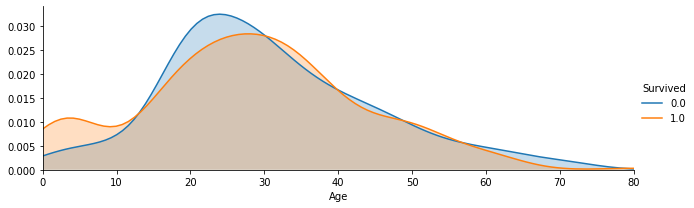

In [80]:
s = sns.FacetGrid(dataset,hue='Survived',aspect=3)
s.map(sns.kdeplot,'Age',shade=True)
s.set(xlim=(0,dataset['Age'].max()))
s.add_legend()

## From the above graph we can see that the survival rate of children is higher than the other  age groups

In [85]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]

#transforming categorical values into numerical values as our model is designed to work with numerical values only

#The features: 'Sex', 'Embarked' are the ones which we'll be coverting to numeric
data['Sex'] = data['Sex'].map({'female':0, 'male':1})
data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3})

#We discretize 'Age' as it is continous and we're trying to work with discrete values only
data['Age'] = pd.qcut(data['Age'].rank(method='first'), 10, labels = False)



## We then look for any missing values in our dataset that might cause our model to malfunction, if there's any, we then drop it or replace it with the most occurent value in that column

In [86]:
training_set = data[data.train == 1]
test_set = data[data.train == 0]

data.isnull().sum()

Age            0
Embarked    1309
Fare           0
Parch          0
Pclass         0
Sex         1309
SibSp          0
Survived       0
train          0
dtype: int64


## From here we can see that there's indeed null values in our dataset, so we deal with the missing values by replacing them with the mean of their respective features

In [72]:

data['Survived'].fillna(data.Survived.mean(), inplace=True)
data['Age'].fillna(data.Age.mean(), inplace=True)
data['Embarked'].fillna(data.Embarked.mean(), inplace=True)
data['Fare'].fillna(data.Fare.mean(), inplace=True)




## Below is our processed training dataset


In [73]:
training_set.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,1,NaN,7.2500,0,3,NaN,1,0.0,1
1,7,NaN,71.2833,0,1,NaN,1,1.0,1
2,3,NaN,7.9250,0,3,NaN,0,1.0,1
3,6,NaN,53.1000,0,1,NaN,1,1.0,1
4,6,NaN,8.0500,0,3,NaN,0,0.0,1
5,3,NaN,8.4583,0,3,NaN,0,0.0,1
6,9,NaN,51.8625,0,1,NaN,0,0.0,1
7,0,NaN,21.0750,1,3,NaN,3,0.0,1
8,3,NaN,11.1333,2,3,NaN,0,1.0,1
9,0,NaN,30.0708,0,2,NaN,1,1.0,1


In [17]:
training_set.isnull()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [18]:
training_set.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
train       0
dtype: int64

## It's then evident that we've successfully removed the null values in our training set

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## We then do some data exploration

Below is the correlation matrix between all the numerical values


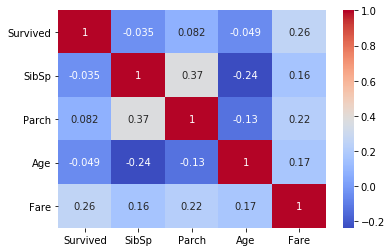

In [28]:
print("Below is the correlation matrix between all the numerical values")

crr_matrix = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, cmap = "coolwarm")

## We can see that the correlation between numerical values and the Survived column is not so high, but it doesn't mean that the other features are useless.

## We then look at how each feature affects the survival rate

relation between Fare and survived


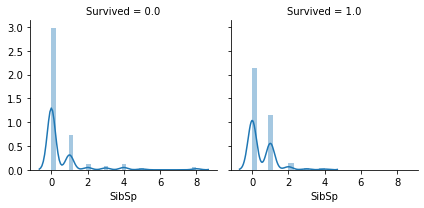

In [39]:
print("relation between Fare and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'SibSp')

relation between SibSp  and survived


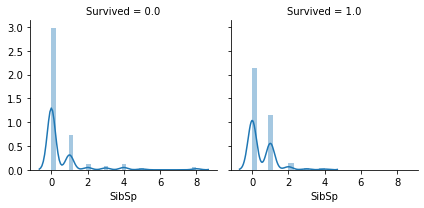

In [41]:
print("relation between SibSp  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'SibSp')

relation between Age  and survived


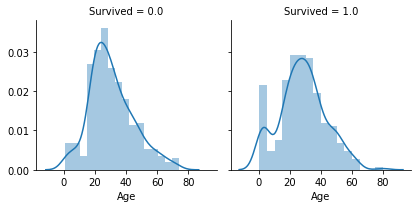

In [42]:
print("relation between Age  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'Age')

relation between Pclass  and survived


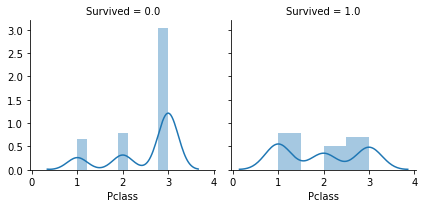

In [44]:
print("relation between Pclass  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'Pclass')

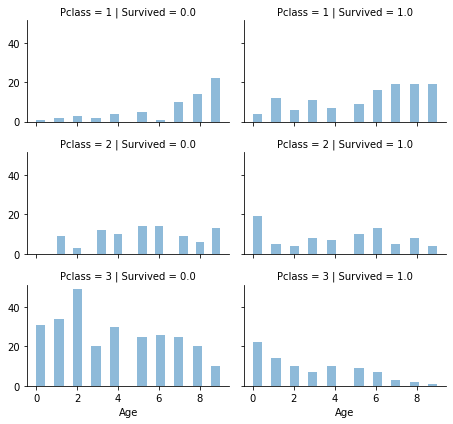

In [46]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

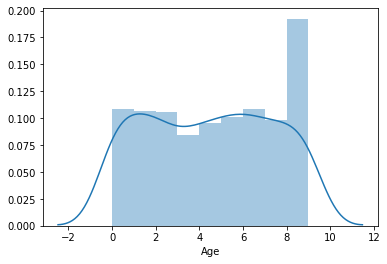

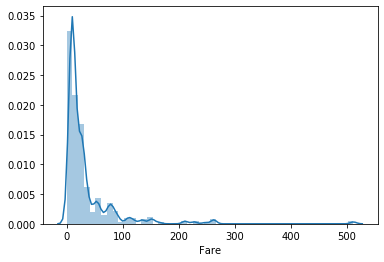

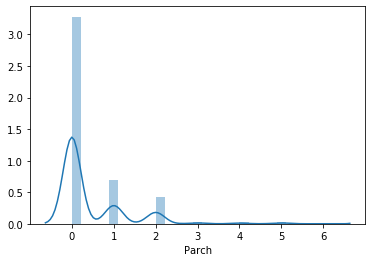

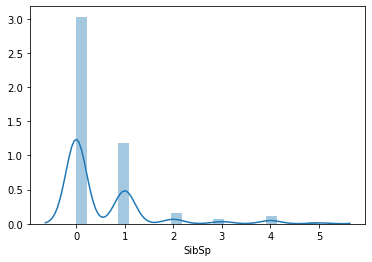

In [47]:
continuous_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_features:
    sns.distplot(training_set[feature])
    plt.show()

## We can see that Fare, SibSp, and Parch have a distribution that is almost normal and is slightly skewed to the left while age has a distribution close to Gaussian.

# We then split our data into training and validation using a 70-30 split ratio

In [51]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3, random_state=42)

In [52]:
clsf = multiNB()

In [53]:
clsf.fit(X_train, y_train)

In [55]:
predictions = clsf.predict(X_test.values)

clsf.acc_score(predictions, y_test)

0.638676844783715